In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import pprint
import glob
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Thesis/Plots')
myfiles = glob.glob('*.txt')
# print(myfiles)
print(len(myfiles))

Mounted at /content/gdrive
5801


In [ ]:
list = []
x = []

for ele in myfiles:
    # file = open(ele)
    # content = file.readlines()

    f = open(ele,'r')
    
    # list.append(f)
    for i in f:
        # list.append(i)
        list.append(i)
        # print(i)
    temp = []
    fileName = ele.split('_')
    for i in range(0,6):
      temp.append(float(fileName[i]))

    x.append(temp)
    
# print(list[0])

y = []

for i in list:
  # row = re.split("\\s+", list[j])
  list_ele = re.split("\\s+", i)
  temp = []
  for j in range(100,200):
    temp.append(float(list_ele[j]))
  # print(list_ele)
  y.append(temp)


x = np.array(x)
y = np.array(y)

x = x/25


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


# TO GET SOME DATAPONTS UNSEEN BY MODEL
x = x_val[:116]
y = y_val[:116]

x_val = x_val[116:]
y_val = y_val[116:]

In [ ]:
len(x_val)

465

# NN

In [ ]:
input_size = 6
output_size = 100
hidden_layer_size = 50
    
model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(6, 1)), # input layer

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(100, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# NUM_EPOCHS = 5
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
145/145 [==============================] - 7s 42ms/step - loss: 0.0377 - accuracy: 0.0371 - val_loss: 0.0254 - val_accuracy: 0.0473
Epoch 2/200
145/145 [==============================] - 4s 27ms/step - loss: 0.0231 - accuracy: 0.0489 - val_loss: 0.0200 - val_accuracy: 0.0710
Epoch 3/200
145/145 [==============================] - 4s 25ms/step - loss: 0.0188 - accuracy: 0.0694 - val_loss: 0.0162 - val_accuracy: 0.0817
Epoch 4/200
145/145 [==============================] - 4s 28ms/step - loss: 0.0161 - accuracy: 0.0823 - val_loss: 0.0148 - val_accuracy: 0.1140
Epoch 5/200
145/145 [==============================] - 5s 37ms/step - loss: 0.0145 - accuracy: 0.0942 - val_loss: 0.0129 - val_accuracy: 0.1226
Epoch 6/200
145/145 [==============================] - 4s 26ms/step - loss: 0.0130 - accuracy: 0.1013 - val_loss: 0.0121 - val_accuracy: 0.1269
Epoch 7/200
145/145 [==============================] - 4s 26ms/step - loss: 0.0120 - accuracy: 0.1058 - val_loss: 0.0113 - val_accuracy:

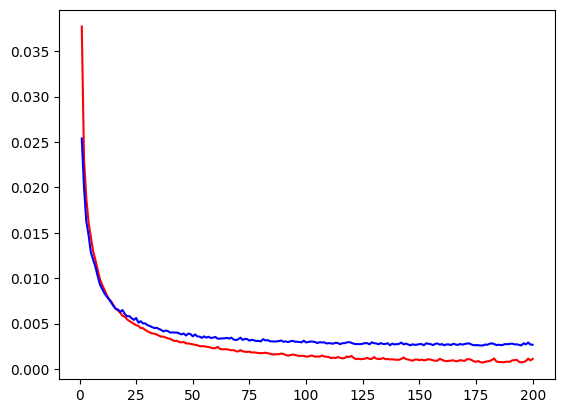

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch = range(1,201)
plt.plot(epoch,training_loss, 'r', label="Training Loss")
plt.plot(epoch,validation_loss, 'b', label="Validation Loss")
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

19/19 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 0.3862
Test loss: 0.00. Test accuracy: 38.62%


In [ ]:
axs = []
for i in range(1,101):
  axs.append(i)

In [ ]:
y_pred = model.predict([x])
# y_pred

4/4 [==============================] - 0s 7ms/step


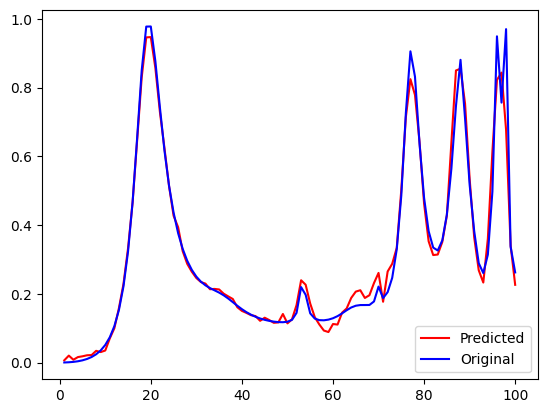

In [ ]:
plt.plot(axs,y_pred[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()


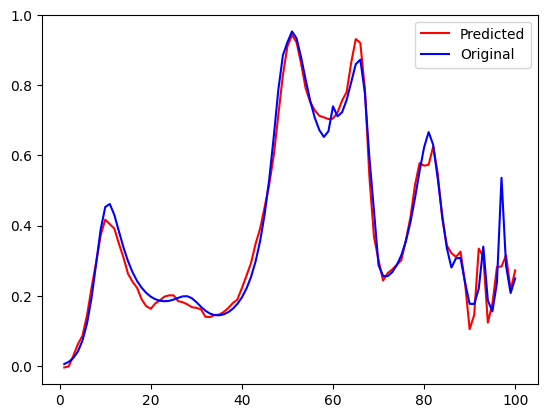

In [ ]:
plt.plot(axs,y_pred[105],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()


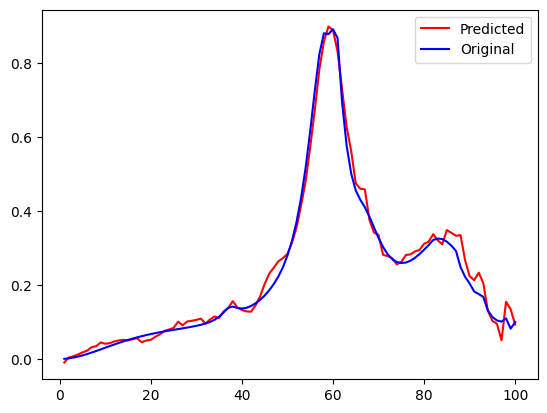

In [ ]:
plt.plot(axs,y_pred[107],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()


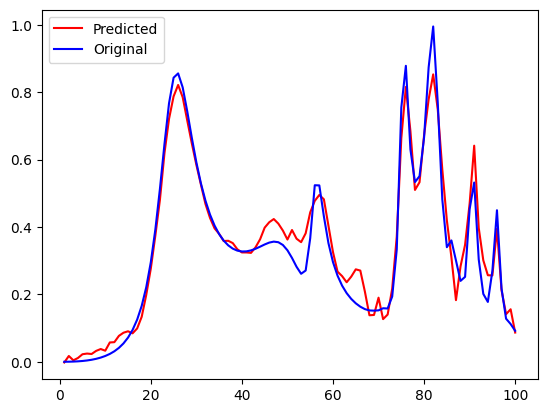

In [ ]:
plt.plot(axs,y_pred[112],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()


In [ ]:
# arr_x1 = [10., 12., 15.,  0., 10.,  5.]
# arr_y1 = [2.44193435e-04, 8.67099117e-04, 1.98006551e-03, 3.77273575e-03,
#        6.49019069e-03, 1.04587710e-02, 1.61260183e-02, 2.41232242e-02,
#        3.53645646e-02, 5.12057493e-02, 7.36986888e-02, 1.05994723e-01,
#        1.52948839e-01, 2.21876797e-01, 3.22914753e-01, 4.66718690e-01,
#        6.53628385e-01, 8.49779203e-01, 9.77631131e-01, 9.77936803e-01,
#        8.76995605e-01, 7.42087130e-01, 6.16840256e-01, 5.15052393e-01,
#        4.36332641e-01, 3.76368446e-01, 3.30784064e-01, 2.96108208e-01,
#        2.69793755e-01, 2.50000255e-01, 2.35342831e-01, 2.24644981e-01,
#        2.16707450e-01, 2.10160159e-01, 2.03544667e-01, 1.95715294e-01,
#        1.86316495e-01, 1.75855458e-01, 1.65262116e-01, 1.55363654e-01,
#        1.46641093e-01, 1.39254264e-01, 1.33163991e-01, 1.28241485e-01,
#        1.24337951e-01, 1.21324659e-01, 1.19122080e-01, 1.17741050e-01,
#        1.17382576e-01, 1.18752246e-01, 1.24302597e-01, 1.44624359e-01,
#        2.19558682e-01, 1.97085506e-01, 1.43177780e-01, 1.27983527e-01,
#        1.23456162e-01, 1.22976768e-01, 1.24922344e-01, 1.28955446e-01,
#        1.35095075e-01, 1.43175536e-01, 1.52230462e-01, 1.60269292e-01,
#        1.65384592e-01, 1.67326434e-01, 1.67390717e-01, 1.67566638e-01,
#        1.77766892e-01, 2.21072900e-01, 1.87497688e-01, 2.04924032e-01,
#        2.46484384e-01, 3.29750562e-01, 4.86606067e-01, 7.26547583e-01,
#        9.05639280e-01, 8.32070819e-01, 6.37323923e-01, 4.79132850e-01,
#        3.82341883e-01, 3.34549983e-01, 3.26092435e-01, 3.55458450e-01,
#        4.30308016e-01, 5.65192144e-01, 7.46765905e-01, 8.80899431e-01,
#        7.09501828e-01, 5.17687411e-01, 3.82765113e-01, 2.89323028e-01,
#        2.60301318e-01, 3.14027811e-01, 4.97646546e-01, 9.49313129e-01,
#        7.56414081e-01, 9.70221834e-01, 3.37023006e-01, 2.62279949e-01]

# x1 = []
# y1 = []
# for i in arr_x1:
#   x1.append(float(i))

# x1 = np.array(x1)

# for i in arr_y1:
#   y1.append(float(i))

# y1 = np.array(y1)

# y1 = y1.reshape(1,-1)
# print(y1.shape)
# # pred_x1 = reverse_model.predict(y1)
# # print(pred_x1)





# arr_x2 = [18., 10.,  8.,  8.,  8.,  5.]
# arr_y2 = [0.00520803, 0.01142523, 0.02243802, 0.04114803, 0.072022  ,
#        0.12124097, 0.19483278, 0.29133749, 0.38975362, 0.45299823,
#        0.46152831, 0.4300234 , 0.38349035, 0.33763186, 0.29836202,
#        0.26664977, 0.24172808, 0.22247598, 0.2078904 , 0.197204  ,
#        0.18988419, 0.18559542, 0.18413922, 0.18534719, 0.18886497,
#        0.19375299, 0.1979877 , 0.19851033, 0.19288106, 0.18172344,
#        0.16857682, 0.15703159, 0.14892877, 0.14465933, 0.14402899,
#        0.1468046 , 0.1529365 , 0.16263458, 0.17641017, 0.1951339 ,
#        0.2201297 , 0.25331037, 0.29733722, 0.35572469, 0.432653  ,
#        0.53191278, 0.65383188, 0.78750036, 0.88542429, 0.92299625,
#        0.95349731, 0.93394856, 0.8800334 , 0.815686  , 0.75590947,
#        0.70740761, 0.67237172, 0.65278849, 0.6690147 , 0.73989683,
#        0.71156557, 0.72314912, 0.75843771, 0.80863116, 0.86029247,
#        0.87328686, 0.77863523, 0.59233358, 0.44179717, 0.28706013,
#        0.25633697, 0.25560762, 0.26700293, 0.28674446, 0.31535865,
#        0.35527345, 0.40938836, 0.47829185, 0.55412541, 0.62288882,
#        0.66656508, 0.63026188, 0.5337006 , 0.4268792 , 0.33544366,
#        0.2802863 , 0.30658489, 0.30754483, 0.23710514, 0.17679407,
#        0.17623394, 0.22003984, 0.34010677, 0.18618986, 0.15515211,
#        0.23769979, 0.53612229, 0.28524751, 0.20762937, 0.24934088]

# x2 = []
# y2 = []
# for i in arr_x2:
#   x2.append(float(i))

# x2 = np.array(x2)

# for i in arr_y2:
#   y2.append(float(i))

# y2 = np.array(y2)

# y2 = y2.reshape(1,-1)
# print(y2.shape)
# # pred_x2 = reverse_model.predict(y2)
# # print(pred_x2)





# arr_x3 = [20., 16., 15., 20.,  8.,  3.]
# arr_y3 = [0.00138673, 0.00282557, 0.00485929, 0.00748217, 0.01064715,
#        0.01427655, 0.01827388, 0.02253475, 0.02695582, 0.03144119,
#        0.0359069 , 0.04028393, 0.04451921, 0.04857456, 0.05242449,
#        0.05605401, 0.05945689, 0.06263424, 0.0655934 , 0.068347  ,
#        0.07091234, 0.07331092, 0.07556831, 0.0777142 , 0.07978282,
#        0.08181377, 0.08385352, 0.08595802, 0.08819727, 0.0906639 ,
#        0.0934893 , 0.09687608, 0.10116369, 0.10695537, 0.11527709,
#        0.12710264, 0.13939194, 0.14269486, 0.13903242, 0.13730739,
#        0.1392929 , 0.14420095, 0.15145032, 0.16088867, 0.17262512,
#        0.18680078, 0.20360008, 0.22383122, 0.24890098, 0.28045728,
#        0.32052416, 0.37166407, 0.43685807, 0.51874608, 0.61743805,
#        0.72594169, 0.82436512, 0.88138953, 0.87915565, 0.89220531,
#        0.86855249, 0.69450933, 0.57723918, 0.50169904, 0.45645061,
#        0.43122948, 0.41114037, 0.3855224 , 0.35650285, 0.32821874,
#        0.30351182, 0.28421674, 0.27087498, 0.26313336, 0.26029434,
#        0.26163858, 0.26653114, 0.27439655, 0.28461773, 0.29641373,
#        0.30897912, 0.32276337, 0.32653139, 0.32512463, 0.31807115,
#        0.30728085, 0.29304964, 0.24966738, 0.22319542, 0.20510688,
#        0.1834322 , 0.17645428, 0.16887004, 0.13226155, 0.11427192,
#        0.10513621, 0.10202676, 0.1108311 , 0.08291965, 0.10078614]

# x3 = []
# y3 = []
# for i in arr_x3:
#   x3.append(float(i))

# x3 = np.array(x3)

# for i in arr_y3:
#   y3.append(float(i))

# y3 = np.array(y3)

# y3 = y3.reshape(1,-1)
# print(y3.shape)
# # pred_x3 = reverse_model.predict(y3)
# # print(pred_x3)





# arr_x4 = [ 5., 12.,  5.,  0., 10.,  3.]
# arr_y4 = [-1.93416224e-04, -1.52942289e-05,  3.78585488e-04,  1.06178179e-03,
#         2.11619345e-03,  3.63502721e-03,  5.72746379e-03,  8.52568163e-03,
#         1.21951656e-02,  1.69496436e-02,  2.30726271e-02,  3.09484870e-02,
#         4.11073758e-02,  5.42901692e-02,  7.15417081e-02,  9.43416892e-02,
#         1.24778274e-01,  1.65747216e-01,  2.21086463e-01,  2.95362869e-01,
#         3.92621816e-01,  5.12921619e-01,  6.46129172e-01,  7.67111478e-01,
#         8.43180056e-01,  8.55936385e-01,  8.14401294e-01,  7.43333482e-01,
#         6.64993839e-01,  5.92083070e-01,  5.29534133e-01,  4.78090024e-01,
#         4.36774977e-01,  4.04141149e-01,  3.78786091e-01,  3.59521965e-01,
#         3.45399051e-01,  3.35675506e-01,  3.29770465e-01,  3.27212539e-01,
#         3.27584717e-01,  3.30461795e-01,  3.35334983e-01,  3.41520488e-01,
#         3.48057443e-01,  3.53619687e-01,  3.56496967e-01,  3.54732744e-01,
#         3.46504125e-01,  3.30760329e-01,  3.08058693e-01,  2.81759498e-01,
#         2.61022700e-01,  2.70681404e-01,  3.66539415e-01,  5.23892561e-01,
#         5.23402183e-01,  4.31449873e-01,  3.52118880e-01,  2.95640414e-01,
#         2.55358682e-01,  2.25801674e-01,  2.03552749e-01,  1.86501949e-01,
#         1.73330142e-01,  1.63270342e-01,  1.56089656e-01,  1.52188524e-01,
#         1.51608669e-01,  1.52425411e-01,  1.58648741e-01,  1.57913162e-01,
#         1.93440257e-01,  3.33400590e-01,  7.54499721e-01,  8.78488471e-01,
#         6.30278478e-01,  5.33321968e-01,  5.50896016e-01,  6.66118872e-01,
#         8.73845297e-01,  9.95270036e-01,  7.69401543e-01,  4.81747286e-01,
#         3.39956287e-01,  3.60026128e-01,  3.00474723e-01,  2.39902714e-01,
#         2.51859299e-01,  4.53023116e-01,  5.31942322e-01,  3.03521199e-01,
#         2.01233551e-01,  1.77413775e-01,  2.70023283e-01,  4.49700217e-01,
#         2.17585883e-01,  1.27693744e-01,  1.11877118e-01,  9.16895620e-02]

# x4 = []
# y4 = []
# for i in arr_x4:
#   x4.append(float(i))

# x4 = np.array(x4)

# for i in arr_y4:
#   y4.append(float(i))

# y4 = np.array(y4)

# y4 = y4.reshape(1,-1)
# print(y4.shape)
# # pred_x4 = reverse_model.predict(y4)
# # print(pred_x4)